# Plot 2: Behaviors and heart disease


### Does alcohol consumption increase the risk for heart disease? Let's plot alcohol consumption along with body mass index categories, which we already know are related to heart disease. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# first read in the data
df = pd.read_sas('LLCP2017.XPT',format='xport')

In [3]:
# Now let's clean up the data set
# select columns: alcohol usage, BMI, heart disease, and age less than or greater than 65
df_plot = df[['ALCDAY5','_BMI5CAT','_MICHD','_AGE65YR']].dropna()

# Select people that are between 18 and 64 years old
df_plot = df_plot[df_plot['_AGE65YR']==1]

# 888 coreesponds to 0 alcoholic drinks per month
df_plot = df_plot.replace({'ALCDAY5':{888.0: 0.0}})

# greater than 300 means they didn't repond
df_plot = df_plot.loc[df_plot['ALCDAY5']<300]

#  2 _ _ is _ _ drinks per month
df_plot.loc[df_plot['ALCDAY5']>200,'alc_p_month'] = df_plot['ALCDAY5']-200

# 1 _ _ is _ _ drinks per week, multiply by 4 to get approximate drinks per month
df_plot.loc[(df_plot['ALCDAY5']<200) & (df_plot['ALCDAY5']>100),'alc_p_month'] = (df_plot['ALCDAY5']-100)*4

# also set 0 drinks in alc_p_month columns
df_plot.loc[(df_plot['ALCDAY5']==0.0),'alc_p_month'] = 0.0

# for heart disease 1 is yes and 2 is no
df_plot['heart_disease'] = df_plot['_MICHD']*-1+2

#Remove entries less than 0
df_plot = df_plot[df_plot['heart_disease']>=0]

#Select relevant columns
df_plot2 = df_plot[['alc_p_month','_BMI5CAT','heart_disease']].copy()

#Put alcohol data into different bins for plotting
bin_input = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 30]
df_plot2['drink_bins'] = pd.cut(x=df_plot2['alc_p_month'],bins=bin_input)

#group data by BMI and drink bins
df_plot3 = df_plot2.groupby(['_BMI5CAT','drink_bins']).agg({'heart_disease': ['count','sum']})

#calculate the proportion of people in each bin that have heart disease
df_plot3['heart_risk'] = df_plot3['heart_disease']['sum']/df_plot3['heart_disease']['count']

#pivot the df so it is ready for plotting
df_plot4 = df_plot3[['heart_risk']].reset_index().pivot(index='drink_bins',columns='_BMI5CAT',values='heart_risk')

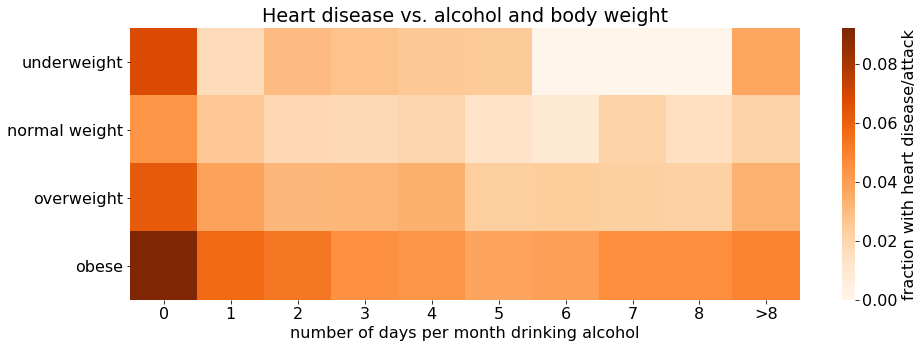

In [4]:
#Plot the results
plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 16})
sns.heatmap(df_plot4.transpose(),cmap='Oranges',cbar_kws={'label': 'fraction with heart disease/attack'})
locs, labels = plt.yticks()
plt.yticks(locs, ['underweight', 'normal weight', 'overweight', 'obese'],rotation=0)
plt.ylabel('')
locs, labels = plt.xticks()
plt.xticks(locs, ['0','1','2','3','4','5','6','7','8','>8'],rotation=0)
plt.xlabel('number of days per month drinking alcohol')
plt.title('Heart disease vs. alcohol and body weight')
plt.savefig('test2.png', bbox_inches='tight')

From this plot we can see that moderate alcohol consumption doesn't seem to increase the risk of heart problems, while being underweight or overweight does increase these risks (as expected).

A few interesting things come out of this plot. Most obviously, people who are obese or overweight have a higher fraction of heart problems. Interestingly, people who drank 4 - 8 alcoholic drinks in the last month seem to have a slightly lower chance of having had heart problems. Those that didn't drink at all seem to have an increased chance of having heart issues, although we would need to explore this further to identify possible confounding variables. Age is a possibility, although only people 18 - 64 years old were selected here.